In [1]:
import tensorflow.keras as keras
import tensorflow as tf

# Keras Learning I
### Classifying Movie Reviews Using Keras

In [2]:
# Imports
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
# Numpy
import numpy as np
# Model Definition
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
# Timing
import time
# Plotting
import matplotlib.pyplot as plt

In [3]:
# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # Create an all zero matrix of shape (len(seq), dim)
    results = np.zeros((len(sequences), dimension))
    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data) # Vectorize train_data
x_test = vectorize_sequences(test_data)  # Vectorize test_data
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

### Book Notes:

* The input data is vectors, and the labels are scalars (1s and 0s).
* A simple stack  of fully connected (Dense) layers with relu activations: Dense(16, activation='relu')
* 16 --> number of hidden units of the layer.

#### Architecture (explained in Ch. 4):
* Two intermediate layers with 16 hidden units each.
* A third layer that will output the scalar prediction regarding the sentiment of the current review.

In [7]:
# Model Definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [9]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
start_time = time.time()
# Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
print(f"--- {time.time() - start_time} seconds ---")

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/sample - loss: 0.5238 - accuracy: 0.7863 - val_loss: 0.4085 - val_accuracy: 0.8631
Epoch 2/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.3223 - accuracy: 0.9037 - val_loss: 0.3173 - val_accuracy: 0.8858
Epoch 3/20
15000/15000 [==============================] - 1s 53us/sample - loss: 0.2359 - accuracy: 0.9239 - val_loss: 0.2822 - val_accuracy: 0.8921
Epoch 4/20
15000/15000 [==============================] - 1s 53us/sample - loss: 0.1843 - accuracy: 0.9413 - val_loss: 0.2747 - val_accuracy: 0.8906
Epoch 5/20
15000/15000 [==============================] - 1s 50us/sample - loss: 0.1520 - accuracy: 0.9523 - val_loss: 0.2771 - val_accuracy: 0.8889
Epoch 6/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.1245 - accuracy: 0.9616 - val_loss: 0.3192 - val_accuracy: 0.8777
Epoch 7/20
15000/15000 [==============================]

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

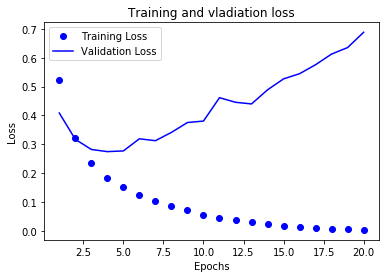

In [12]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and vladiation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

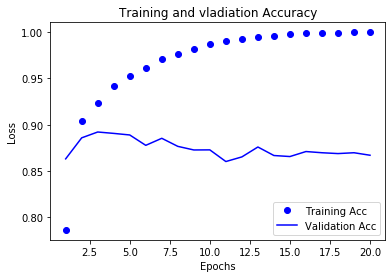

In [13]:
# Plotting the training and validation accuracy
plt.clf() # Clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training Acc")
plt.plot(epochs, val_acc_values, "b", label="Validation Acc")
plt.title("Training and vladiation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
# Retraining a model from scratch
# Model Definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss="binary_crossentropy",
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.4494 - accuracy: 0.8239
Epoch 2/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.2571 - accuracy: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1999 - accuracy: 0.9285
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


In [22]:
results

[0.3076903423023224, 0.8784000277519226]

In [23]:
# You can predict using
model.predict(x_test)

array([[0.14783871],
       [0.99907917],
       [0.77600753],
       ...,
       [0.08207327],
       [0.04039726],
       [0.39734024]], dtype=float32)

### Classifying newswires: a multiclass classification example


In [25]:
# Loading the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2113536/2110848 [==============================] - 0s 0us/step


In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [32]:
# Also a built-in awy to do it in Keras
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [46]:
# Model Definition
# Use 64 units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [47]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [48]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [49]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 108us/step - loss: 2.6997 - accuracy: 0.5081 - val_loss: 1.7746 - val_accuracy: 0.6330
Epoch 2/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.4443 - accuracy: 0.7073 - val_loss: 1.3214 - val_accuracy: 0.6940
Epoch 3/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.0650 - accuracy: 0.7719 - val_loss: 1.1412 - val_accuracy: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.8351 - accuracy: 0.8196 - val_loss: 1.0391 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.6659 - accuracy: 0.8594 - val_loss: 0.9699 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.5318 - accuracy: 0.8900 - val_loss: 0.9242 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.42

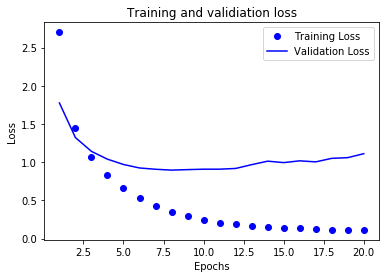

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validiation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

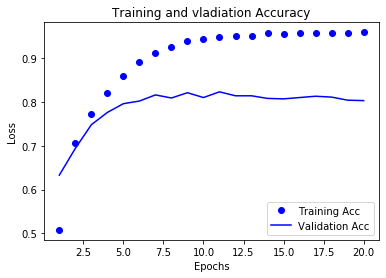

In [51]:
# Plotting the training and validation accuracy
plt.clf() # Clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training Acc")
plt.plot(epochs, val_acc_values, "b", label="Validation Acc")
plt.title("Training and vladiation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()